# bias 实验数据

## 预处理

In [1]:

import pandas as pd

# 文件路径

# qldpc_file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/biased_measurement_qldpc_code_acc_results_new.csv"
qldpc_file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/diff_measurement_qldpc_code_acc_results_20250530_062804.csv"

# 读取CSV文件
qldpc_df = pd.read_csv(qldpc_file_path)

# 删除无关参数列
qldpc_df = qldpc_df.drop(columns=['round','approximate_param', 'priority', 'priority_topk','have_stabilizer' ,'noise_model', 'probability'])

# surface_file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/biased_measurement_surface_code_acc_results_depolarization.csv"
surface_file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/diff_measurement_surface_code_acc_results_20250530_062553.csv"

# surface_file_path ="/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/biased_measurement_surface_code_acc_results_new.csv"
surface_df = pd.read_csv(surface_file_path)
# print(surface_df)
surface_df = surface_df[surface_df['noise_model'] != 'depolarization']
# 删除无关参数列
surface_df = surface_df.drop(columns=['round','approximate_param', 'priority', 'priority_topk','have_stabilizer' ,'noise_model', 'probability'])


In [2]:
surface_df

,code_task,detector_number,d,decoder_method,logical_error_rate,measurement_param
0,surface_code:rotated_memory_x,4,3,MWPM,0.00573,0
1,surface_code:rotated_memory_x,4,3,MWPM,0.00535,1
2,surface_code:rotated_memory_x,4,3,MWPM,0.00561,5
3,surface_code:rotated_memory_x,4,3,MWPM,0.00541,10
4,surface_code:rotated_memory_x,4,3,EAMLD,0.00573,0
...,...,...,...,...,...,...
59,surface_code:rotated_memory_z,40,9,MWPM,0.01845,10
60,surface_code:rotated_memory_z,40,9,EAMLD,0.01820,0
61,surface_code:rotated_memory_z,40,9,EAMLD,0.01868,1
62,surface_code:rotated_memory_z,40,9,EAMLD,0.01832,5


qldpc_df

In [3]:
qldpc_df

,code_task,detector_number,nkd,decoder_method,logical_error_rate,measurement_param
0,bivariate_bicycle_code:rotated_memory_x,36,"[72, 12, 6]",BP+OSD,0.24829,0
1,bivariate_bicycle_code:rotated_memory_x,36,"[72, 12, 6]",BP+OSD,0.27623,1
2,bivariate_bicycle_code:rotated_memory_x,36,"[72, 12, 6]",BP+OSD,0.36825,5
3,bivariate_bicycle_code:rotated_memory_x,36,"[72, 12, 6]",BP+OSD,0.47302,10
4,bivariate_bicycle_code:rotated_memory_x,36,"[72, 12, 6]",EAMLD,0.13841,0
...,...,...,...,...,...,...
59,bivariate_bicycle_code:rotated_memory_z,72,"[144, 12, 12]",BP+OSD,0.71775,10
60,bivariate_bicycle_code:rotated_memory_z,72,"[144, 12, 12]",EAMLD,0.29557,0
61,bivariate_bicycle_code:rotated_memory_z,72,"[144, 12, 12]",EAMLD,0.29694,1
62,bivariate_bicycle_code:rotated_memory_z,72,"[144, 12, 12]",EAMLD,0.30801,5


In [4]:
qldpc_df.columns


Index(['code_task', 'detector_number', 'nkd', 'decoder_method',
       'logical_error_rate', 'measurement_param'],
      dtype='object')

In [5]:
# 1. 合并X和Z，logical_error_rate取平均值
surface_r1_df = surface_df.groupby(['detector_number', 'd', 'decoder_method', 'measurement_param'],
                               as_index=False)['logical_error_rate'].mean()
qldpc_r1_df = qldpc_df.groupby(['detector_number', 'nkd', 'decoder_method', 'measurement_param'],
                             as_index=False)['logical_error_rate'].mean()


In [6]:
# surface_r1_df = surface_r1_df[~((surface_r1_df['decoder_method'] == 'EAMLD-bias') & (surface_r1_df['is_biased'] == False))]

# qldpc_r1_df = qldpc_r1_df[~((qldpc_r1_df['decoder_method'] == 'EAMLD-bias') & (qldpc_r1_df['is_biased'] == False))]


In [7]:
# 统一使用四组数据：
# surface_r1_df = surface_r1_df[surface_r1_df['biased_param'] != 3.0]

In [8]:
surface_d3_df = surface_r1_df[surface_r1_df['d'] == 3]
surface_d5_df = surface_r1_df[surface_r1_df['d'] == 5]
surface_d7_df = surface_r1_df[surface_r1_df['d'] == 7]
surface_d9_df = surface_r1_df[surface_r1_df['d'] == 9]

In [9]:
qldpc_nkd_72_12_6_df = qldpc_r1_df[qldpc_r1_df['nkd'] == "[72, 12, 6]"]
qldpc_nkd_90_8_10_df = qldpc_r1_df[qldpc_r1_df['nkd'] == "[90, 8, 10]"]
qldpc_nkd_108_8_10_df = qldpc_r1_df[qldpc_r1_df['nkd'] == "[108, 8, 10]"]
qldpc_nkd_144_12_12_df = qldpc_r1_df[qldpc_r1_df['nkd'] == "[144, 12, 12]"]

## 图例

In [10]:
# colors = {
#     "MWPM": '#FF00FF',  # 品红，和其他颜色在色相上有较大差异
#     "BP+OSD": '#FFA500',  # 橙色，与其他颜色的色调不同
#     "EAMLD": '#00FFFF',  # 青色，明亮且与其他颜色有明显区别
#     "EAMLD-bias": '#FF6347',  # 鲑鱼红，与其他颜色在色调和明度上有不同
# }
# colors = {
#     "MWPM": '#FF69B4',     # 深粉红（保留原色，经典算法高对比）
#     "BP+OSD": '#FF4500',   # 橙红
#     "EAMLD": '#40E0D0',    # 青色
#     "EAMLD-bias": '#FF6347',
# }

colors = {
    "MWPM": '#3A6EA5',     # 
    "BP+OSD": '#E89C31',   # 
    "EAMLD": '#9BBF88',    # 
    # "EAMLD-bias": '#FF6347',
}

# markers = {
#     "MWPM": '.', 
#     "BP+OSD": '.', 
#     "EAMLD": '.', 
#     "EAMLD-bias": '.', 
# }

markers = {
    "MWPM": '.',     # 
    "BP+OSD": '.',   # 
    "EAMLD": '.',    # 
    # "EAMLD-bias": '#FF6347',
}


# linestyles = {
#     "MWPM": '-', 
#     "BP+OSD": '-', 
#     "EAMLD": '-', 
#     "EAMLD-bias": '-', 
# }
linestyles = {
    "MWPM": '-',     # 
    "BP+OSD": '-',   # 
    "EAMLD": '-',    # 
    # "EAMLD-bias": '#FF6347',
}

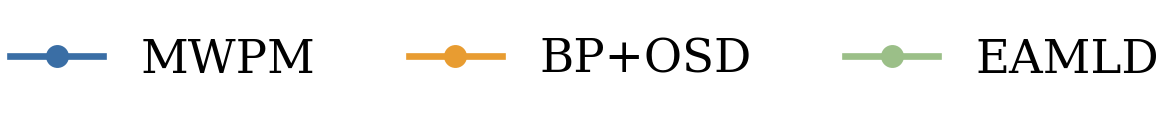

In [11]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path

plt.rcParams['font.family'] = 'serif'  # 使用衬线字体

# 创建图例元素
legend_elements = []
for key in colors.keys():
    line = Line2D([0], [0], color=colors[key], marker=markers[key], linestyle=linestyles[key],
                label=f"{key}", markersize=20*1.5, linewidth=4*1.2, markeredgewidth=1.5)
    legend_elements.append(line)

        

# prop={'size': 24*1.2, 'family': 'serif', 'weight': 'bold'}
prop={'size': 28*1.2}

# 创建一个空的图形
fig, ax = plt.subplots(figsize=(len(legend_elements)*2, 1))  # 根据图例数量调整宽度

ax.legend(handles=legend_elements, loc='center', ncol=len(legend_elements), 
          frameon=False, borderpad=0, prop=prop)  # 设置字体大小为12

# 隐藏坐标轴和边框
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # 去除空白边距

# 保存图片为PDF
save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/diff_measure_performance")
save_dir.mkdir(parents=True, exist_ok=True)
save_path = save_dir / f"diff_measure_performance_result_legend.pdf"
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

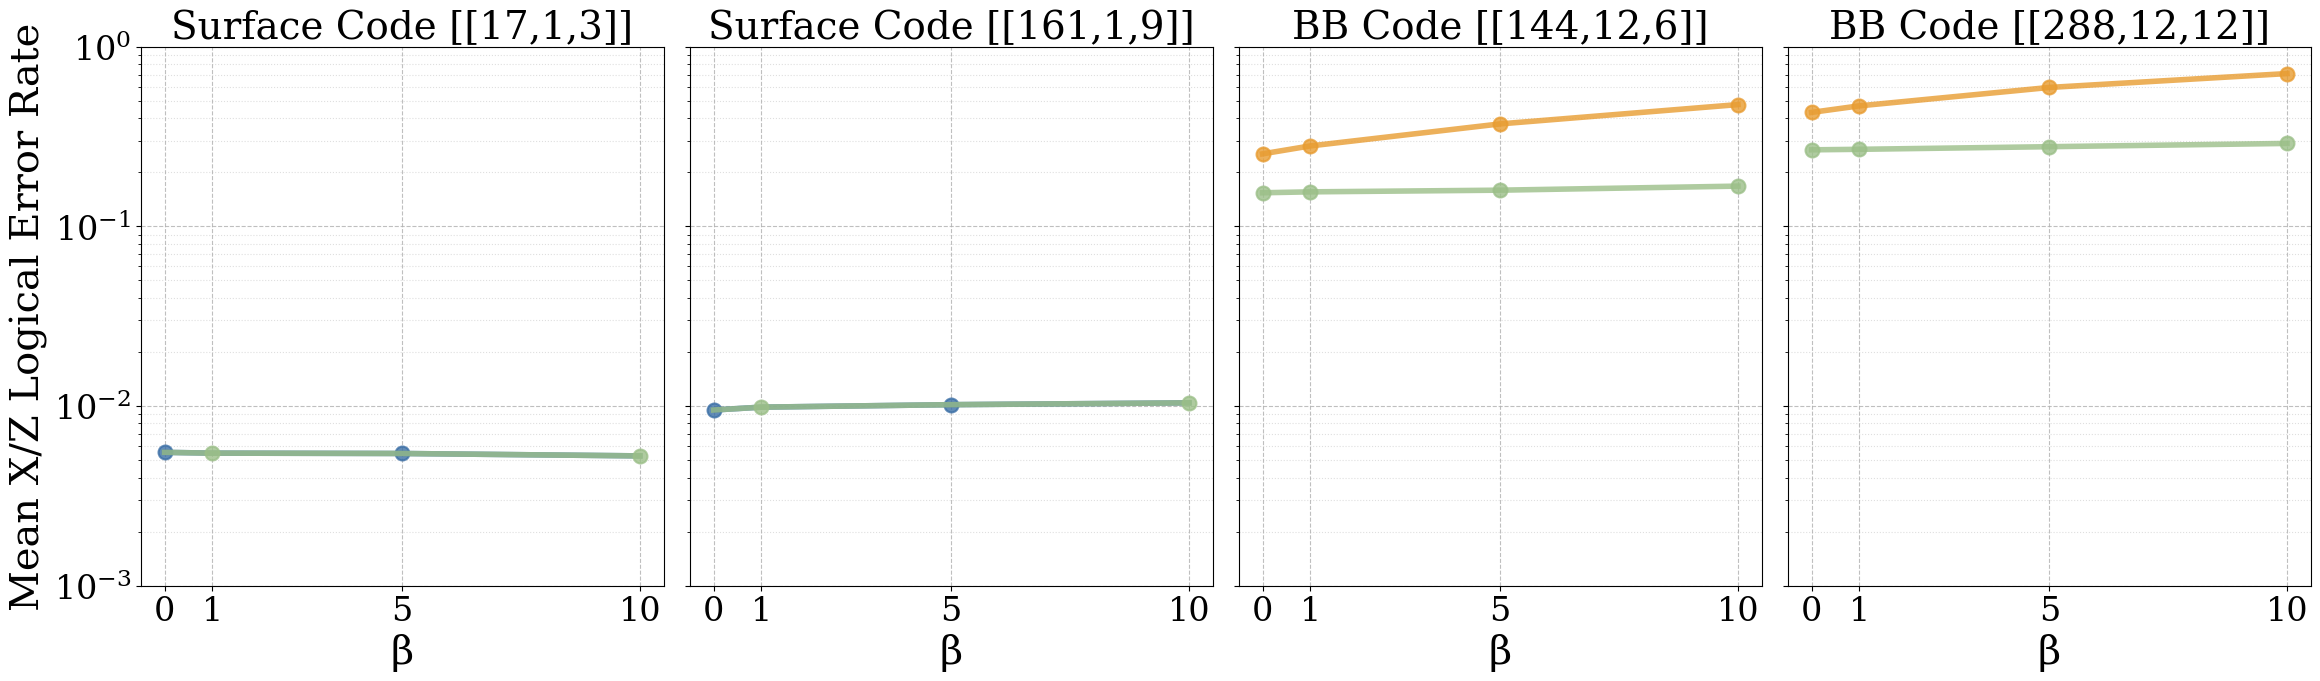

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


def plot_logical_error_rate_ax(ax, df, name, code, colors, markers, linestyles, x_ticks=[0, 1, 5, 10],
                               show_x_ticks=True, show_y_ticks=True,
                               y_ticks=[0.001,0.01, 0.1, 1], use_markevery=True):
    # sorted_methods = ['MWPM', 'BP+OSD', 'EAMLD', 'EAMLD-bias']
    sorted_methods = ['MWPM', 'BP+OSD', 'EAMLD']
    # sorted_is_bias = [True, False]
    
    if use_markevery:
        markevery = (0, df['decoder_method'].nunique())
        # markevery = (0, 2)
    else:
        markevery = None

    for label in sorted_methods:
        # for lable1 in sorted_is_bias:
        if label in df['decoder_method'].unique():
            group = df[(df['decoder_method'] == label)]
            ax.plot(group['measurement_param'],
                    group['logical_error_rate'],
                    color=colors[label],
                    marker=markers[label],
                    linestyle=linestyles[label],
                    # label=label,
                    alpha=0.8,
                    markersize=20,
                    linewidth=4,
                    markevery=markevery,
                    markeredgewidth=1.5)
            if use_markevery:
                markevery = (markevery[0] + 1 , markevery[1])

    # title = f'{code} with {name}'
    
    if code == "Surface Code":
        title = f'{code} {name}'
        ax.set_title(title, fontsize=28, pad=12)
    else:
        title = f'{code} {name}'
        ax.set_title(title, fontsize=28, pad=12)
    ax.set_title(title, fontsize=28)

    if show_x_ticks:
        ax.set_xlabel('β', fontsize=24*1.2)
        ax.set_xticks(x_ticks)
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', labelsize=20*1.2)
    else:
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([])
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', labelsize=20*1.2)

    ax.set_yscale('log')

    if show_y_ticks:
        ax.set_ylabel('Mean X/Z Logical Error Rate', fontsize=24*1.2)
        ax.set_yticks(ticks=y_ticks)
        ax.tick_params(axis='y', which='major', labelsize=20*1.2)
    else:
        ax.set_yticks(y_ticks)
        ax.set_yticklabels([])
        ax.tick_params(axis='y', which='major', labelsize=20*1.2)

    ax.minorticks_on()
    ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='x')
    ax.grid(False, which='minor', axis='x')
    ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='y')
    ax.grid(True, linestyle=':', alpha=0.4, which='minor', axis='y')


# fig, axes = plt.subplots(1, 4, figsize=(40, 8), sharey=True)
fig, axes = plt.subplots(1, 4, figsize=(28, 7))

# plot_logical_error_rate_ax(axes[0], surface_d3_df, name="d=3", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=True)
# plot_logical_error_rate_ax(axes[1], surface_d5_df, name="d=9", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[100, 300, 600], use_markevery=False)
# plot_logical_error_rate_ax(axes[2], qldpc_nkd_72_12_6_df, name="nkd=[72,12,6]", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[30, 50, 70], use_markevery=False)
# plot_logical_error_rate_ax(axes[3], qldpc_nkd_144_12_12_df, name="nkd=[144,12,12]", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=False, show_y_ticks=False, x_ticks=[100, 500, 1000, 2000], use_markevery=False)

# plot_logical_error_rate_ax(axes[0], surface_d3_df, name="d=3", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=True, use_markevery=True)
# plot_logical_error_rate_ax(axes[1], surface_d5_df, name="d=9", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, use_markevery=True)
# plot_logical_error_rate_ax(axes[2], qldpc_nkd_72_12_6_df, name="nkd=[72,12,6]", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, use_markevery=True)
# plot_logical_error_rate_ax(axes[3], qldpc_nkd_144_12_12_df, name="nkd=[144,12,12]", code='QLDPC Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, use_markevery=True)


plot_logical_error_rate_ax(axes[0], surface_d3_df, name="[[17,1,3]]", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=True, use_markevery=True)
plot_logical_error_rate_ax(axes[1], surface_d5_df, name="[[161,1,9]]", code='Surface Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, use_markevery=True)
plot_logical_error_rate_ax(axes[2], qldpc_nkd_72_12_6_df, name="[[144,12,6]]", code='BB Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, use_markevery=False)
plot_logical_error_rate_ax(axes[3], qldpc_nkd_144_12_12_df, name="[[288,12,12]]", code='BB Code', colors=colors, markers=markers, linestyles=linestyles, show_x_ticks=True, show_y_ticks=False, use_markevery=False)

2
# 调整子图之间的间距
plt.subplots_adjust(wspace=0.05)  # wspace 控制子图之间的水平间距

# 保存图片为PDF
save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/diff_measure_performance")
save_dir.mkdir(parents=True, exist_ok=True)
save_path = save_dir / "diff_measure_plots_row.pdf"
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

plt.show()
    

降低效果

In [13]:
eamld_data = qldpc_nkd_72_12_6_df[qldpc_nkd_72_12_6_df['decoder_method'] == 'EAMLD']
eamld_data = eamld_data['logical_error_rate']
eamld_data

4    0.153860
5    0.155675
6    0.159060
7    0.167540
Name: logical_error_rate, dtype: float64

In [14]:
relative_change = (eamld_data.diff() / eamld_data.shift(1)) * 100
# 计算平均值（忽略第一个NaN值）
average_change = relative_change.mean()

# 输出结果
print(f"EAMLD数据的平均相对变化率为: {average_change:.2f}%")

EAMLD数据的平均相对变化率为: 2.90%


In [15]:
bposd_data = qldpc_nkd_72_12_6_df[qldpc_nkd_72_12_6_df['decoder_method'] == 'BP+OSD']
bposd_data = bposd_data['logical_error_rate']

In [16]:
relative_change = (bposd_data.diff() / bposd_data.shift(1)) * 100
# 计算平均值（忽略第一个NaN值）
average_change = relative_change.mean()

# 输出结果
print(f"EAMLD数据的平均相对变化率为: {average_change:.2f}%")

EAMLD数据的平均相对变化率为: 23.80%


In [17]:
# # 计算上升率
# increase_rate = (bposd_data.values - eamld_data.values) / bposd_data.values

# # 计算平均上升率
# average_increase_rate = increase_rate.mean()

# # 输出结果
# print(f"EAMLD相对于BP+OSD在有偏置情况下的平均逻辑错误率下降率率为: {average_increase_rate:.2%}")

In [18]:
eamld_data = qldpc_nkd_144_12_12_df[qldpc_nkd_144_12_12_df['decoder_method'] == 'EAMLD']
eamld_data = eamld_data['logical_error_rate']

bposd_data = qldpc_nkd_144_12_12_df[qldpc_nkd_144_12_12_df['decoder_method'] == 'BP+OSD']
bposd_data = bposd_data['logical_error_rate']

# # 计算上升率
# increase_rate = (bposd_data.values - eamld_data.values) / bposd_data.values

# # 计算平均上升率
# average_increase_rate = increase_rate.mean()

# # 输出结果
# print(f"144_12_12, BP+OSD在有偏置情况下的平均逻辑错误率xiajiang为: {average_increase_rate:.2%}")

In [19]:
relative_change = (eamld_data.diff() / eamld_data.shift(1)) * 100
# 计算平均值（忽略第一个NaN值）
average_change = relative_change.mean()

# 输出结果
print(f"EAMLD数据的平均相对变化率为: {average_change:.2f}%")

EAMLD数据的平均相对变化率为: 2.77%


In [20]:
relative_change = (bposd_data.diff() / bposd_data.shift(1)) * 100
# 计算平均值（忽略第一个NaN值）
average_change = relative_change.mean()

# 输出结果
print(f"EAMLD数据的平均相对变化率为: {average_change:.2f}%")

EAMLD数据的平均相对变化率为: 18.27%
